Let's import all needed packages.

In [1]:
import perceval as pcvl
import numpy as np

In [2]:
from perceval.components.unitary_components import PS, BS, PERM
import numpy as np

## Use the symbolic skin for display
from perceval.rendering.circuit import DisplayConfig, SymbSkin
DisplayConfig.select_skin(SymbSkin)

Defining a state:

In [3]:
state1 = pcvl.BasicState('|0,2,0,1>')

Another way to do it:

In [4]:
state2 = pcvl.BasicState([0, 2, 0, 1])

Check that the states are indeed the same:

In [5]:
state1 == state2

True

Let's define a phase shifter:

In [6]:
phase_shifter = PS(phi = np.pi)

In [7]:
pcvl.pdisplay(phase_shifter.definition())

<IPython.core.display.Math object>

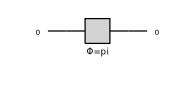

In [8]:
pcvl.pdisplay(phase_shifter)

Now a beam splitter:

In [9]:
beam_splitter = BS()

In [10]:
pcvl.pdisplay(beam_splitter.definition())

<IPython.core.display.Math object>

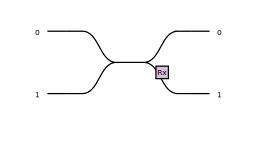

In [11]:
pcvl.pdisplay(beam_splitter)

In [12]:
pcvl.pdisplay(BS().compute_unitary())

<IPython.core.display.Math object>

Note that you can define the phases directly numerically, or define them as parameters with a name that can be set to a numerical value later one in your code.

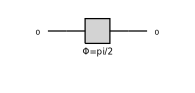

In [13]:
phase_shifter = PS(phi = np.pi/2)
pcvl.pdisplay(phase_shifter)

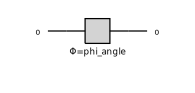

In [14]:
phi_angle = pcvl.P('phi_angle')
phase_shifter = PS(phi = phi_angle)
pcvl.pdisplay(phase_shifter)

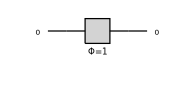

In [15]:
phi_angle.set_value(1)
pcvl.pdisplay(phase_shifter)

Now let us create a small circuit with these components:

In [16]:
circuit = pcvl.Circuit(3)  # Create a 3 mode circuit

In [17]:
circuit.add(0, BS())

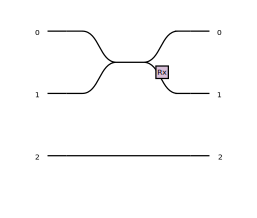

In [18]:
pcvl.pdisplay(circuit)

In [19]:
circuit.add(0, PS(phi=np.pi/2)).add(1, PS(phi=pcvl.P('phi'))).add(1, BS())

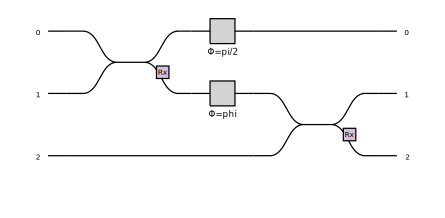

In [20]:
pcvl.pdisplay(circuit)

In [25]:
pcvl.pdisplay(circuit.U)
circuit.get_parameters()[0].set_value(0)

<IPython.core.display.Math object>

If we want to simulate this circuit we need to define a processor with a backend. 

In [22]:
processor = pcvl.Processor("SLOS", circuit)

Let us add an input state:

In [23]:
processor.with_input(pcvl.BasicState([1,1,1]))

Different algorithms can be chosen, but here let's sample from the circuit as we would do in an actual experiment:

In [26]:
sampler = pcvl.algorithm.Sampler(processor)

sample_count = sampler.sample_count(1000)
print(sample_count['results'])

{
  |2,1,0>: 271
  |2,0,1>: 220
  |0,3,0>: 192
  |0,2,1>: 70
  |0,1,2>: 55
  |0,0,3>: 192
}


How can we fix this?

Alternative: getting the probability table with Analyzer.

In [27]:
processor_naive = pcvl.Processor("Naive", circuit)
analyzer = pcvl.algorithm.Analyzer(processor_naive, [pcvl.BasicState([1,1,1])], '*')
pcvl.pdisplay(analyzer)

,"|1,0,2>","|2,1,0>","|0,3,0>","|2,0,1>","|0,1,2>","|1,1,1>","|1,2,0>","|0,2,1>","|3,0,0>","|0,0,3>"
"|1,1,1>",0,1/4,3/16,1/4,1/16,0,0,1/16,0,3/16


Check that the values are the same?

In [28]:
192/1000

0.192

In [29]:
3/16

0.1875

Instead of manually defining the components of a circuit, we can also define a unitary and Perceval will generate the corresponding circuit:

In [30]:
circuit_matrix = pcvl.Unitary(pcvl.Matrix.random_unitary(3))

In [31]:
processor_unitary = pcvl.Processor("SLOS", circuit_matrix)
processor_unitary.with_input(pcvl.BasicState([1,1,1]))

In [32]:
sampler = pcvl.algorithm.Sampler(processor_unitary)

sample_count = sampler.sample_count(1000)
print(sample_count['results'])

{
  |3,0,0>: 105
  |2,1,0>: 93
  |2,0,1>: 62
  |1,2,0>: 47
  |1,1,1>: 136
  |1,0,2>: 180
  |0,3,0>: 188
  |0,2,1>: 26
  |0,1,2>: 42
  |0,0,3>: 121
}
